In [3]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import signal
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from xmitgcm import open_mdsdataset

In [4]:
SVB = xr.open_dataset('curtain_SSH_SVB_fasterPulse.nc')
noSVB = xr.open_dataset('curtain_SSH_NoSVB_fasterPulse.nc')

In [26]:
def plot_spectrogram(timeseries, X, indices, colors, kind='linear', title='', xlim=[0,40]):
    sns.set_style('whitegrid')
    sns.set_context('notebook')

    samp_freq = 1/600 # 10 min data
    
    fig,(ax) = plt.subplots(1,1,figsize=(10,6))

    # Useful freq to period indicators
#     ax.axvline(1, color='k', alpha=0.3, linestyle='-') 
#     ax.axvline(5, color='k', alpha=0.3, linestyle='-') 
#     ax.axvline(8, color='k', alpha=0.3, linestyle='-') 
#     ax.axvline(11, color='k', alpha=0.3, linestyle='-') 
#     ax.axvline(17, color='k', alpha=0.3, linestyle='-') 

#     ax.text(1,1E-10,'1', fontweight='bold',fontsize=12)
#     ax.text(5,1E-9,'5', fontweight='bold',fontsize=12)
#     ax.text(8,1E-9,'8', fontweight='bold',fontsize=12)
#     ax.text(11,1E-10,'11', fontweight='bold',fontsize=12)
#     ax.text(17,1E-10,'17', fontweight='bold',fontsize=12)

    # cells along coast(ish)
    for kk,col in zip(indices,colors) :
        #freq_per, Pxx_den_per = signal.welch(timeseries[:,kk], samp_freq, detrend='constant')
        freq_per, Pxx_den_per = signal.periodogram(timeseries[:,kk], samp_freq, detrend='constant')
        
        if kind == 'semilog':
            ax.semilogy(freq_per*(86400), Pxx_den_per,'-',color=col, alpha=0.7, label='%1.1f km' %X[kk])
        elif kind=='linear':
            ax.plot(freq_per*(86400), Pxx_den_per,'-',color=col, alpha=0.7, label='%1.1f km' %X[kk])  
        else:
            raise Exception("%s is not a valid value for kind" %kind)
            
    ax.legend()
    ax.set_xlim(xlim)
    ax.set_ylabel('PSD')
    ax.set_xlabel('Frequency (cpd)')
    ax.set_title(title)
    return fig, ax

def plot_spectrogram2(ax,timeseries, X, col, lab,kind='linear', title='', xlim=[0,40]):
    sns.set_style('whitegrid')
    sns.set_context('notebook')

    samp_freq = 1/600 # 10 min data
    
    freq_per, Pxx_den_per = signal.periodogram(timeseries, samp_freq, detrend='constant')
        
    if kind == 'semilog':
        ax.semilogy(freq_per*(86400), Pxx_den_per,color=col, alpha=1, label=lab, linewidth=2)
    elif kind=='linear':
        ax.plot(freq_per*(86400), Pxx_den_per,color=col, alpha=1, label=lab, linewidth=2)  
    else:
        raise Exception("%s is not a valid value for kind" %kind)
    #print((freq_per[1:]-freq_per[:-1])*86400)
    ax.legend()
    ax.set_xlim(xlim)
    ax.set_ylabel('PSD')
    ax.set_xlabel('Frequency (cpd)')
    ax.set_title(title)
    return ax

(1e-06, 100)

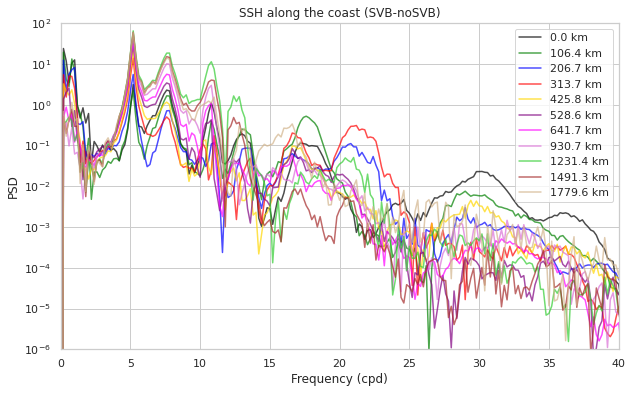

In [6]:
indices = [0,50,100,150,200,250,300,350,400,450,500]
colors = ['k', 'g','b','r','gold','purple','magenta','orchid','limegreen','brown','tan']
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]

kind = 'semilog'
title = 'SSH along the coast (SVB-noSVB)'
fig, ax = plot_spectrogram(timeseries,X, indices, colors, kind=kind, title=title)
ax.set_ylim(1E-6,100)

(0.0, 70.0)

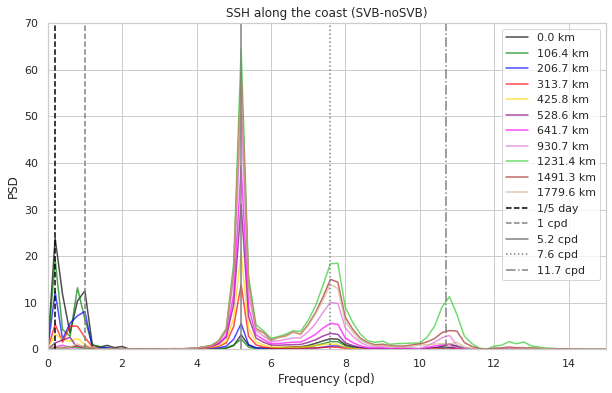

In [7]:
kind = 'linear'
title = 'SSH along the coast (SVB-noSVB)'
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries,X, indices, colors, 
                           kind=kind, title=title, xlim=[0,15])
ax.axvline(0.2, linestyle='--', color='k', label='1/5 day')
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(7.6, linestyle=':', color='0.5', label='7.6 cpd')
ax.axvline(10.7, linestyle='-.', color='0.5', label='11.7 cpd')
ax.legend()
ax.set_ylim(0,70)

(0.0, 600.0)

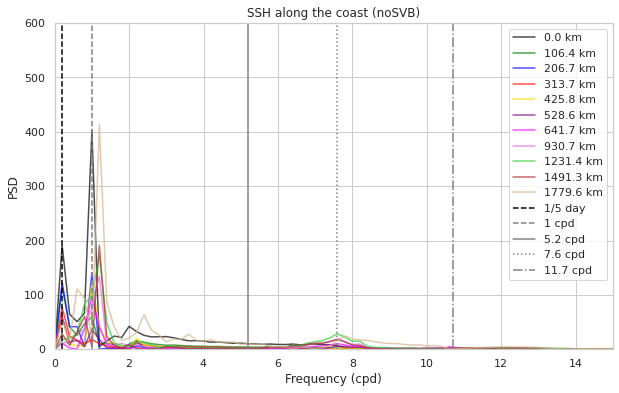

In [8]:
kind = 'linear'
title = 'SSH along the coast (noSVB)'
timeseries = (noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries,X, indices, colors, 
                           kind=kind, title=title, xlim=[0,15])
ax.axvline(0.2, linestyle='--', color='k', label='1/5 day')
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(7.6, linestyle=':', color='0.5', label='7.6 cpd')
ax.axvline(10.7, linestyle='-.', color='0.5', label='11.7 cpd')
ax.legend()
ax.set_ylim(0,600)

(0.0, 600.0)

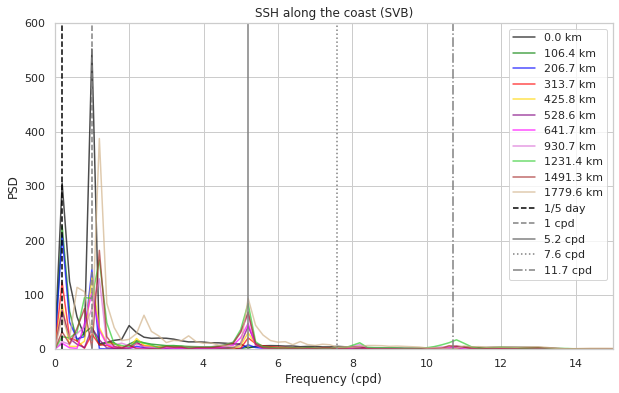

In [9]:
kind = 'linear'
title = 'SSH along the coast (SVB)'
timeseries = (SVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries,X, indices, colors, 
                           kind=kind, title=title, xlim=[0,15])
ax.axvline(0.2, linestyle='--', color='k', label='1/5 day')
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(7.6, linestyle=':', color='0.5', label='7.6 cpd')
ax.axvline(10.7, linestyle='-.', color='0.5', label='11.7 cpd')
ax.legend()
ax.set_ylim(0,600)

(0.0, 70.0)

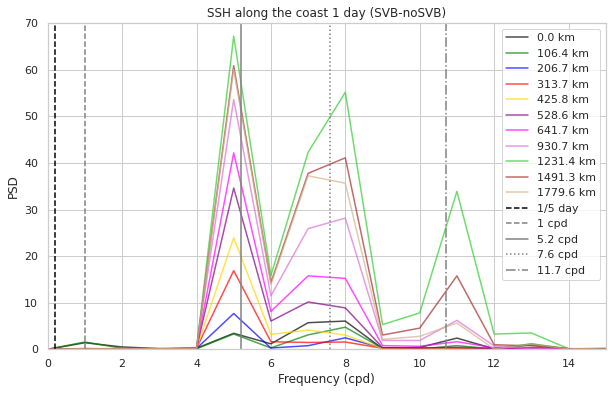

In [10]:
kind = 'linear'
title = 'SSH along the coast 1 day (SVB-noSVB)'
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries[:144,:],X, indices, colors, 
                           kind=kind, title=title,xlim=[0,15])
ax.axvline(0.2, linestyle='--', color='k', label='1/5 day')
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(7.6, linestyle=':', color='0.5', label='7.6 cpd')
ax.axvline(10.7, linestyle='-.', color='0.5', label='11.7 cpd')
ax.legend()
ax.set_ylim(0,70)

(0.0, 70.0)

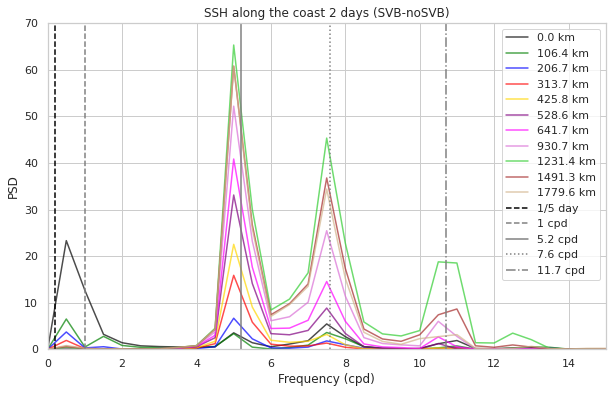

In [11]:
kind = 'linear'
title = 'SSH along the coast 2 days (SVB-noSVB)'
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries[:288,:],X, indices, colors, 
                           kind=kind, title=title, xlim=[0,15])
ax.axvline(0.2, linestyle='--', color='k', label='1/5 day')
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(7.6, linestyle=':', color='0.5', label='7.6 cpd')
ax.axvline(10.7, linestyle='-.', color='0.5', label='11.7 cpd')
ax.legend()
ax.set_ylim(0,70)

(0.0, 35.0)

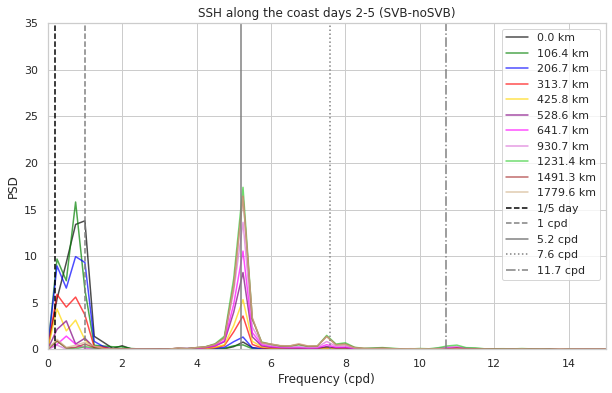

In [12]:
kind = 'linear'
title = 'SSH along the coast days 2-5 (SVB-noSVB)'
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries[144:,:],X, indices, colors, 
                           kind=kind, title=title,xlim=[0,15])
ax.axvline(0.2, linestyle='--', color='k', label='1/5 day')
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(7.6, linestyle=':', color='0.5', label='7.6 cpd')
ax.axvline(10.7, linestyle='-.', color='0.5', label='11.7 cpd')
ax.legend()
ax.set_ylim(0,35)

(0.0, 40.0)

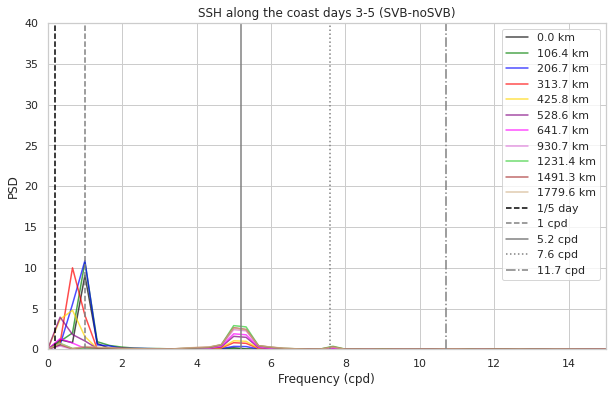

In [13]:
kind = 'linear'
title = 'SSH along the coast days 3-5 (SVB-noSVB)'
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries[288:,:],X, indices, colors, 
                           kind=kind, title=title, xlim=[0,15])
ax.axvline(0.2, linestyle='--', color='k', label='1/5 day')
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(7.6, linestyle=':', color='0.5', label='7.6 cpd')
ax.axvline(10.7, linestyle='-.', color='0.5', label='11.7 cpd')
ax.legend()
ax.set_ylim(0,40)

(0.0, 22.0)

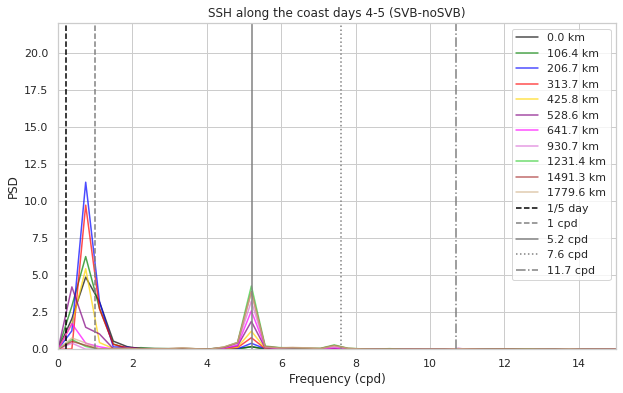

In [14]:
kind = 'linear'
title = 'SSH along the coast days 4-5 (SVB-noSVB)'
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100
X = SVB.X[:]
fig, ax = plot_spectrogram(timeseries[332:,:],X, indices, colors, 
                           kind=kind, title=title, xlim=[0,15])
ax.axvline(0.2, linestyle='--', color='k', label='1/5 day')
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(7.6, linestyle=':', color='0.5', label='7.6 cpd')
ax.axvline(10.7, linestyle='-.', color='0.5', label='11.7 cpd')
ax.legend()
ax.set_ylim(0,22)

In [15]:
samp_freq = 1/600 # 10 min data
kk = 400
timeseries = (SVB.curtain_data.data-noSVB.curtain_data.data)*100

freq_per, Pxx_den_per = signal.periodogram(timeseries[:,kk], samp_freq, detrend='constant')          

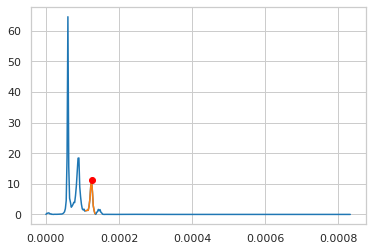

In [16]:
plt.plot(freq_per, Pxx_den_per)
plt.plot(freq_per[47:59], Pxx_den_per[47:59])
plt.plot(freq_per[47+7], Pxx_den_per[47+7],'ro')

In [17]:
print(len(freq_per))

361


In [18]:
print(freq_per[47]*86400)

9.399999999999999


In [19]:
print(np.argmax(Pxx_den_per[47:59]))

7


In [20]:
print(np.max(Pxx_den_per[47:59]))

11.309410597292123


### In the bay

In [30]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/02_SVB_barotropic_output/'
outdir3 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/08_SVB_fasterPulse/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)
ds3 = open_mdsdataset(outdir3, prefix=['eta','dynVars'], levels=levels)

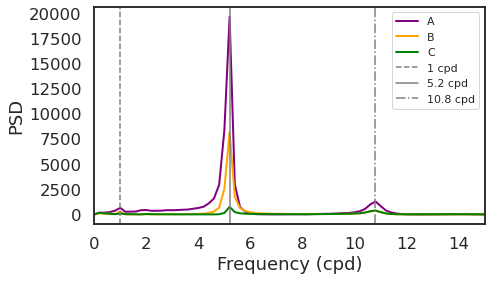

In [27]:
# BASE
sns.set_context('talk')
sns.set_style('white')

lon_inds = [428+59,  428+59, 428+20 ]
lat_inds = [61+3,133,  175]
labels = ['A','B','C']
lat = ds.YC[:,0].data
lats = [lat[lat_inds[0]], lat[lat_inds[1]],lat[lat_inds[2]]]
kind = 'linear'
title = ''#'SSH at two stations in the bay (days 1 to 5)'
colors = ['purple','orange','green']
fig,ax = plt.subplots(1,1,figsize=(7,4))

for ii, jj, col, latt, lab in zip(lon_inds, lat_inds, colors, lats, labels):
    timeseries = np.squeeze(ds['ETAN'][:,jj,ii])*100
    ax = plot_spectrogram2(ax,timeseries[:],latt, col, lab,
                               kind=kind, title=title,xlim=[0,15])
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(10.8, linestyle='-.', color='0.5', label='10.8 cpd')
ax.legend()
plt.show()

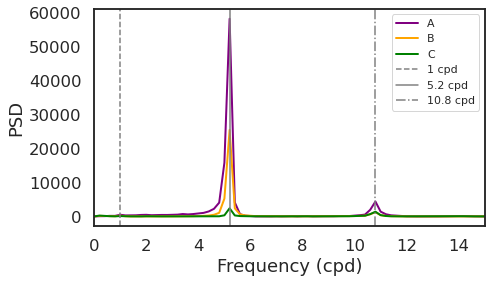

In [28]:
# BAROTOPIC
sns.set_context('talk')
sns.set_style('white')

lon_inds = [428+59,  428+59, 428+20 ]
lat_inds = [61+3,133,  175]
labels = ['A','B','C']
lat = ds.YC[:,0].data
lats = [lat[lat_inds[0]], lat[lat_inds[1]],lat[lat_inds[2]]]
kind = 'linear'
title = ''#'SSH at two stations in the bay (days 1 to 5)'
colors = ['purple','orange','green']
fig,ax = plt.subplots(1,1,figsize=(7,4))

for ii, jj, col, latt, lab in zip(lon_inds, lat_inds, colors, lats, labels):
    timeseries = np.squeeze(ds2['ETAN'][:,jj,ii])*100
    ax = plot_spectrogram2(ax,timeseries[:],latt, col, lab,
                               kind=kind, title=title,xlim=[0,15])
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(10.8, linestyle='-.', color='0.5', label='10.8 cpd')
ax.legend()
plt.show()

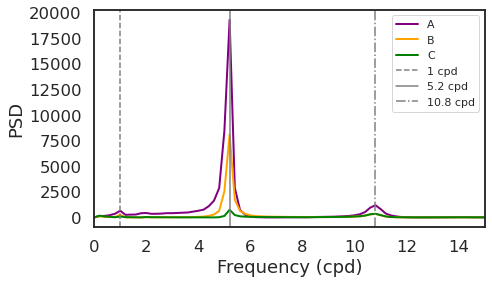

In [31]:
#FASTER PULSE
sns.set_context('talk')
sns.set_style('white')

lon_inds = [428+59,  428+59, 428+20 ]
lat_inds = [61+3,133,  175]
labels = ['A','B','C']
lat = ds.YC[:,0].data
lats = [lat[lat_inds[0]], lat[lat_inds[1]],lat[lat_inds[2]]]
kind = 'linear'
colors = ['purple','orange','green']
fig,ax = plt.subplots(1,1,figsize=(7,4))


for ii, jj, col, latt, lab in zip(lon_inds, lat_inds, colors, lats, labels):
    timeseries = np.squeeze(ds3['ETAN'][:,jj,ii])*100
    ax = plot_spectrogram2(ax,timeseries[:],latt, col, lab,
                               kind=kind, title=title,xlim=[0,15])
ax.axvline(1, linestyle='--', color='0.5', label='1 cpd')
ax.axvline(5.2, linestyle='-', color='0.5', label='5.2 cpd')
ax.axvline(10.8, linestyle='-.', color='0.5', label='10.8 cpd')
ax.legend()
plt.show()

In [23]:
depth = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,144)*600

Depth at station 1: 12.2 m 
Depth at station 2: 10.0 m 


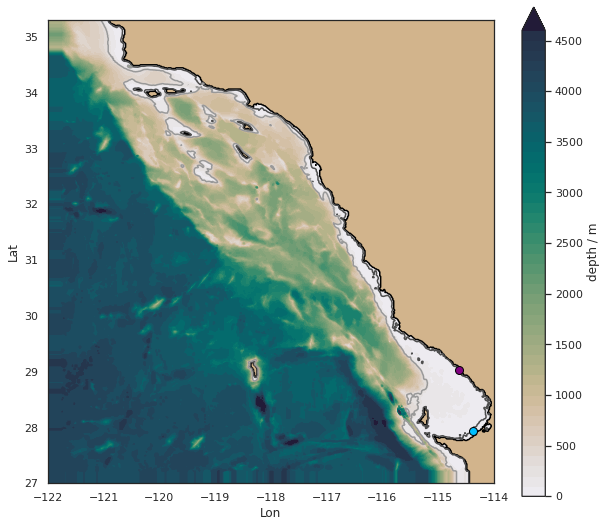

In [24]:
sns.set_style('white')
fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')
pc = ax.contourf(LON,LAT,np.ma.masked_array(depth, mask=mask_dep),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(lon,lat,depth, colors=['0','0.3','0.6'], levels=[0,20,250])

lon_inds = [428+60,387+85]
lat_inds = [61+8,149]
st_model = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
colors = ['deepskyblue','purple','red','darkgoldenrod','gold','lightseagreen',
          'orchid','mediumvioletred', 'slateblue','limegreen','olive','coral','teal','brown']

# ssh transects
for ii, st, col in zip(range(len(lon_inds)),st_model, colors):
    ax.plot(LON[0,lon_inds[ii]],LAT[lat_inds[ii],0],'o', 
            markersize=8, color=col, markeredgecolor='k')
    print('Depth at station %s: %1.1f m ' % (st,depth[lat_inds[ii],lon_inds[ii]]))

cb.set_label('depth / m')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(27,35.3)
ax.set_aspect(1)

In [25]:
5.2 

5.2